# **IMPORTING DEPENDENCIES**

---





In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# **IMPORTING DATASET**

---



In [3]:
iris_dataframe = pd.read_csv('/content/drive/MyDrive/iris.csv')

In [4]:
iris_dataframe.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [35]:
iris_dataframe['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

Text(0.5, 1.0, 'variety vs petal length')

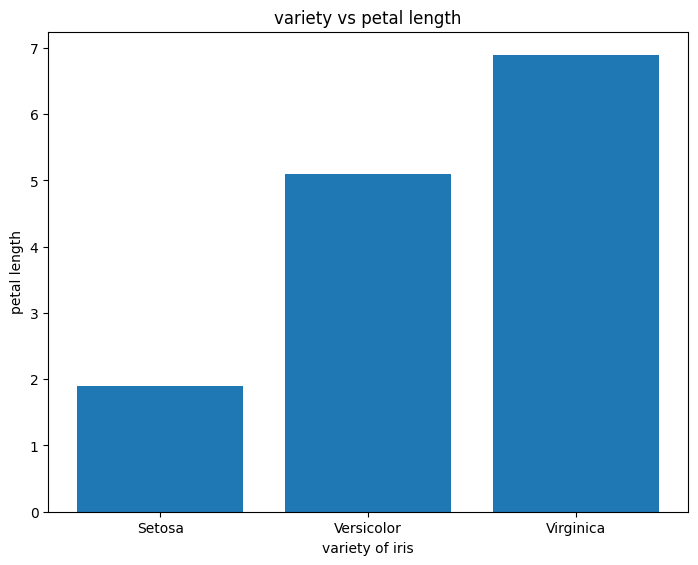

In [37]:
figure = plt.figure()
axes = figure.add_axes([0,0,1,1])
axes.bar(iris_dataframe['variety'],iris_dataframe['petal.length'])
plt.xlabel('variety of iris')
plt.ylabel('petal length')
plt.title('variety vs petal length')

In [5]:
iris_dataframe.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


# **CHECKING FOR NULL VALUE**

---



In [6]:
iris_dataframe.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [7]:
x=iris_dataframe.drop(columns='variety',axis=1)
y=iris_dataframe['variety']

In [8]:
print(x)

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [9]:
print(y)

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object


In [34]:
iris_dataframe['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

<Axes: xlabel='variety', ylabel='count'>

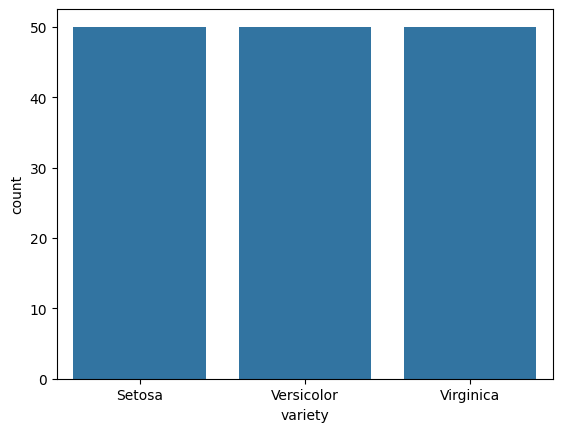

In [25]:
sns.countplot(x='variety',data = iris_dataframe)

# **STANDARDIZATION**

---



In [10]:
scalar=StandardScaler()

In [11]:
scalar.fit(x)

StandardScaler()

In [12]:
standard_data = scalar.transform(x)

In [13]:
x=standard_data

# **SPLINTING TRAIN AND TEST DATA**

---



In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2,stratify=y)

In [15]:
x.shape

(150, 4)

In [16]:
x_test.shape

(30, 4)

In [17]:
x_train.shape

(120, 4)

In [18]:
y_test.shape

(30,)

In [19]:
y_train.shape

(120,)

# **LOADING DATA TO MACHINE**

---



In [20]:
classifier = LogisticRegression()

In [21]:
classifier.fit(x_train,y_train)

LogisticRegression()

In [22]:
xtrain = classifier.predict(x_train)
xtrainaccuracy = accuracy_score(xtrain,y_train)
print(xtrainaccuracy)

0.9666666666666667


In [23]:
xtest = classifier.predict(x_test)
xtestaccuracy = accuracy_score(xtest,y_test)
print(xtestaccuracy)

1.0


# **PREDICTIVE SYSTEM**

---



In [39]:
inputdata = [4.9,3,1.4,.2]
inputarray = np.asarray(inputdata)
reshapearr = inputarray.reshape(1,-1)
stdata = scalar.transform(reshapearr)
predict =classifier.predict(stdata)
print(predict[0],"is the variety")

Setosa is the variety


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
